# Visualizing distributions of data
- histplot
         Plot a histogram of binned counts with optional normalization or smoothing.

- kdeplot
        Plot univariate or bivariate distributions using kernel density estimation.

- rugplot
         Plot a tick at each observation value along the x and/or y axes.

- ecdfplot
         Plot empirical cumulative distribution functions.

- jointplot
           Draw a bivariate plot with univariate marginal distributions.

The axes-level functions are histplot(), kdeplot(), ecdfplot(), and rugplot(). They are grouped together within the figure-level displot(), jointplot(), and pairplot() functions.

In [34]:
import seaborn as sns

In [35]:
%matplotlib inline

In [36]:
tips = sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

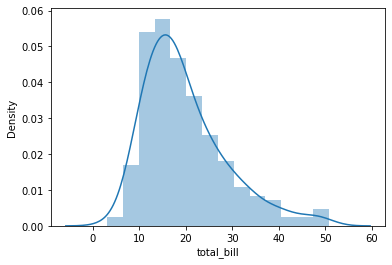

In [43]:
sns.distplot(tips['total_bill'])

- While in histogram mode, it is also possible to add a KDE curve:

<AxesSubplot:xlabel='total_bill'>

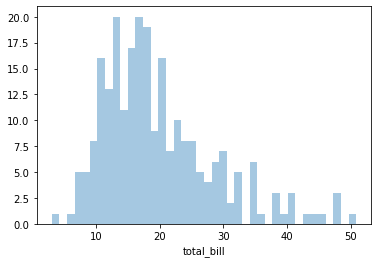

In [42]:
sns.distplot(tips['total_bill'],kde=False,bins=40)

- To draw a bivariate plot, assign both x and y:

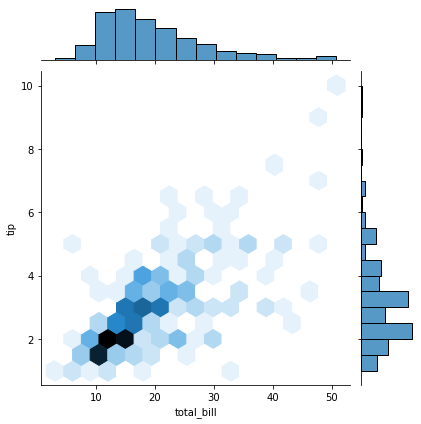

In [40]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

- Currently, bivariate plots are available only for histograms and KDEs:

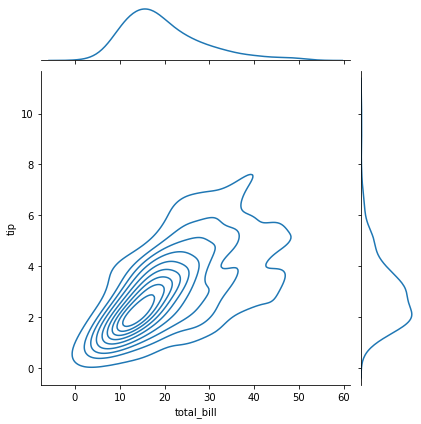

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

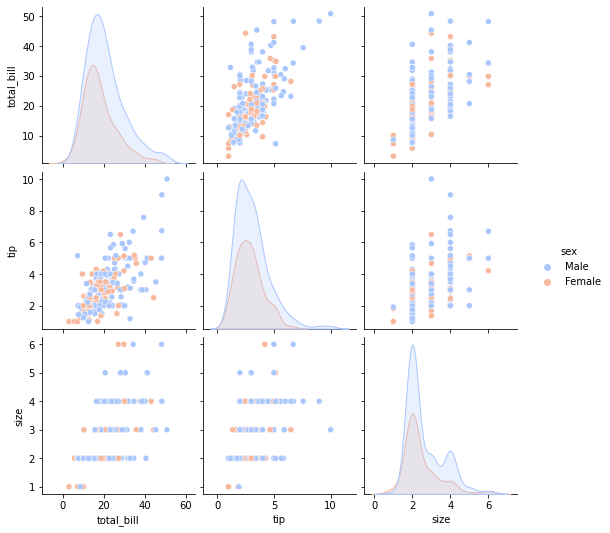

In [23]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

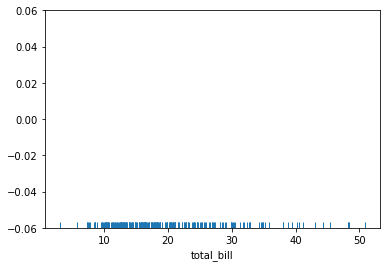

In [24]:
sns.rugplot(tips['total_bill'])

# Categorical plots

- Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

- Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

- Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

-  we saw how to use different visual representations to show the relationship between multiple variables in a dataset.

In [47]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

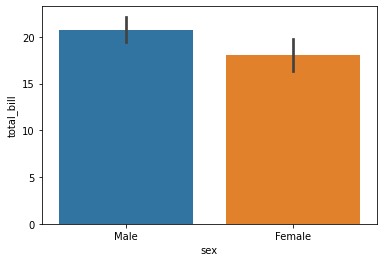

In [51]:
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

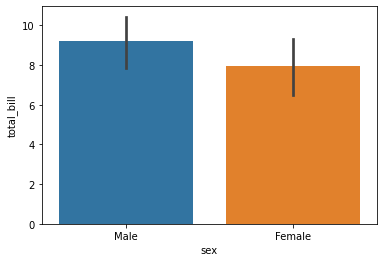

In [53]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

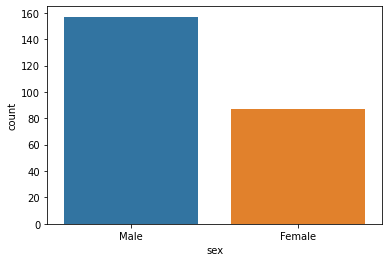

In [54]:
sns.countplot(x='sex',data=tips)

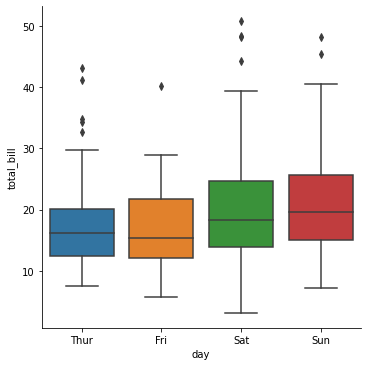

In [55]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

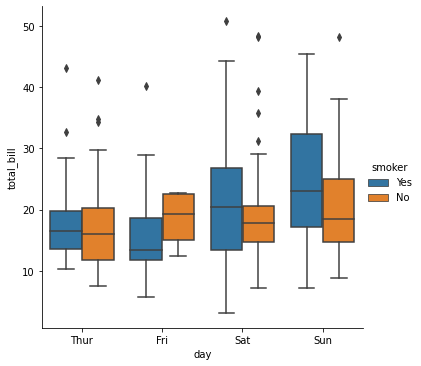

In [56]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

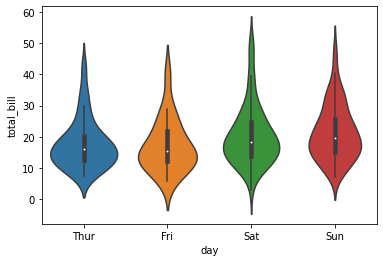

In [59]:
sns.violinplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

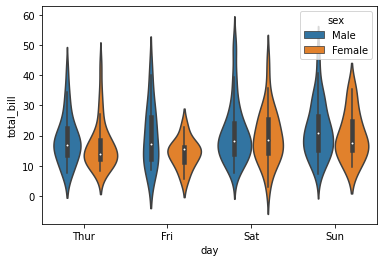

In [60]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

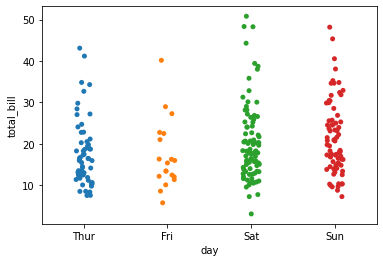

In [66]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

C:\Users\shivs\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


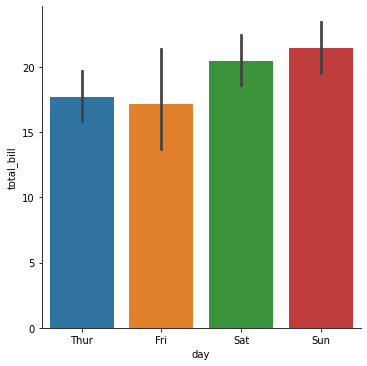

In [68]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

# Matrix plots

In [71]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights=sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [74]:
tc =tips.corr()

- Plot rectangular data as a color-encoded matrix.

<AxesSubplot:>

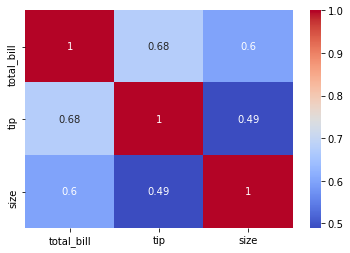

In [77]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [80]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


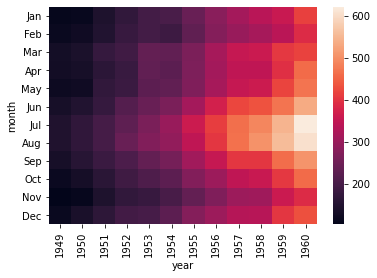

In [96]:
sns.heatmap(fp)
fp

<AxesSubplot:xlabel='year', ylabel='month'>

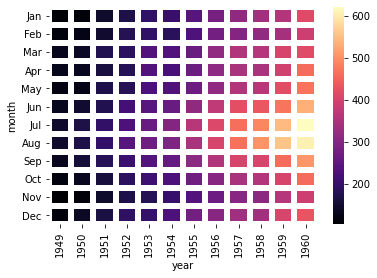

In [97]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=5)


- Plot a matrix dataset as a hierarchically-clustered heatmap.

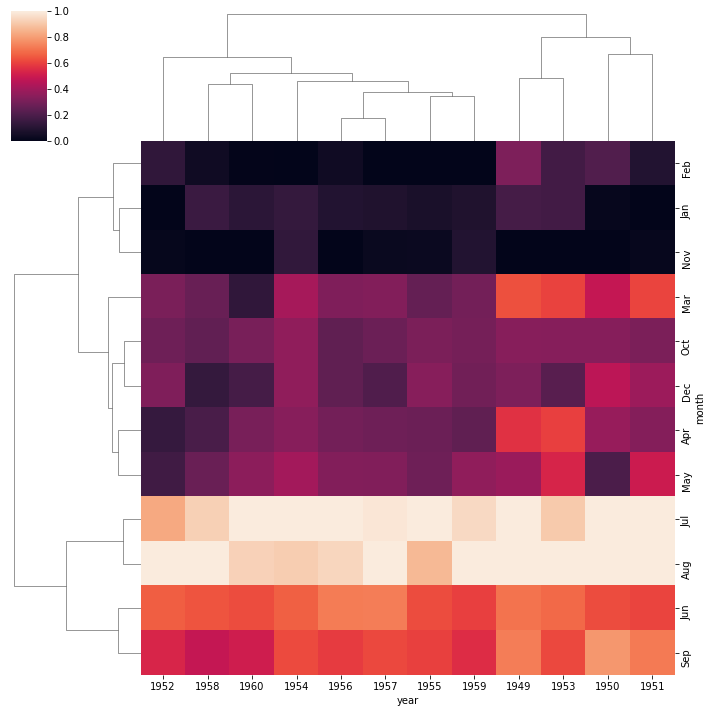

In [99]:
sns.clustermap(fp,standard_scale=1)

# Grids

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
iris= sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


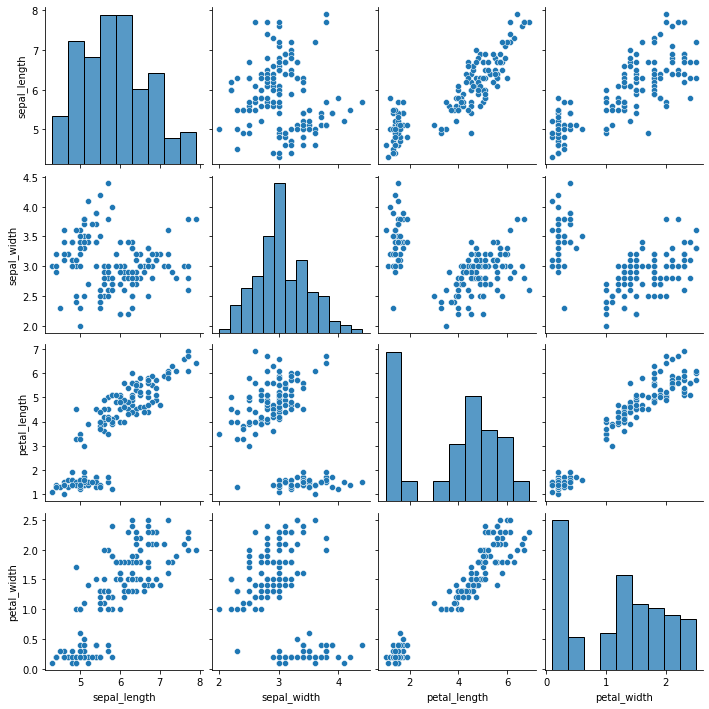

In [8]:
import seaborn as sns
%matplotlib inline
g=sns.pairplot(iris)
g.map(plt.scatter)

/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

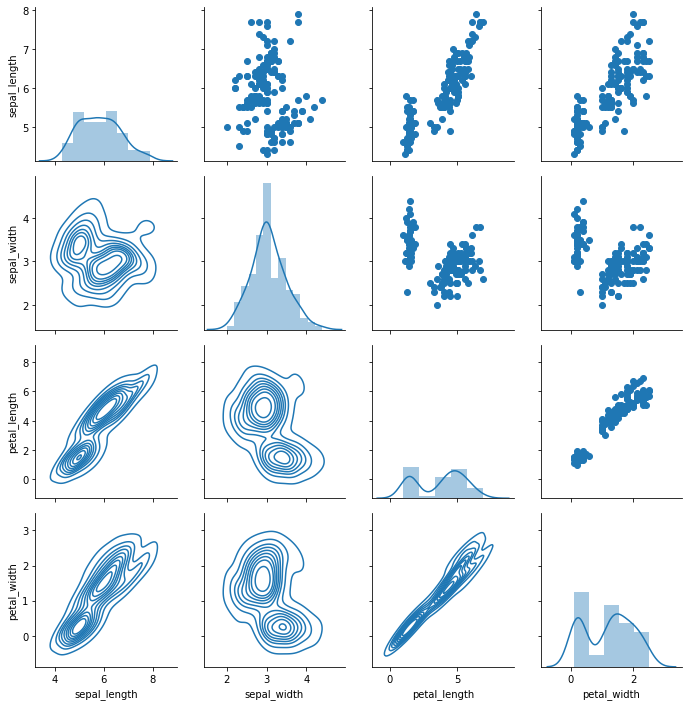

In [9]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [12]:
tips = sns.load_dataset('tips')

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

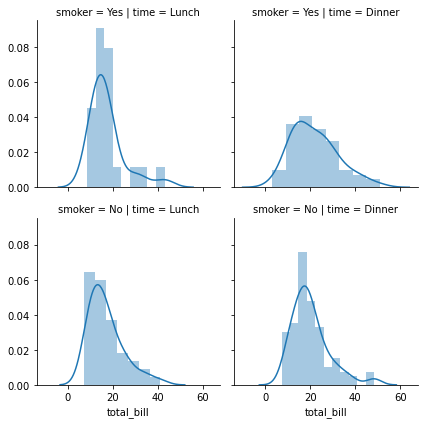

In [15]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')#empty gride
g.map(sns.distplot,'total_bill')

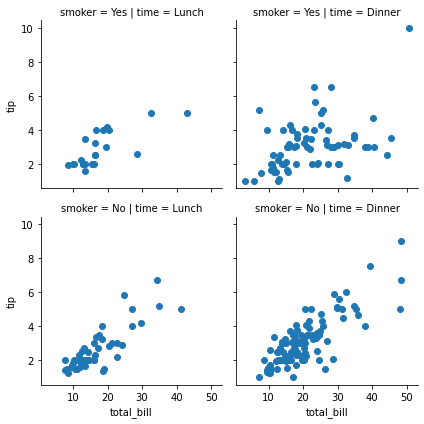

In [17]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')#empty gride
g.map(plt.scatter,'total_bill','tip')

# - Rgeression plots

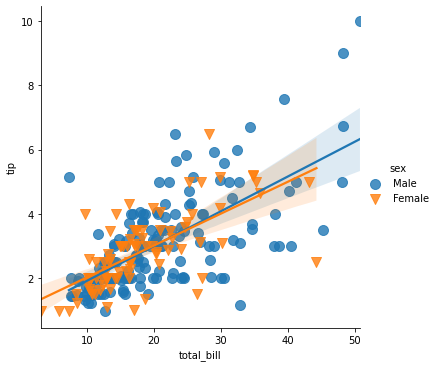

In [23]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

/home/suresh/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


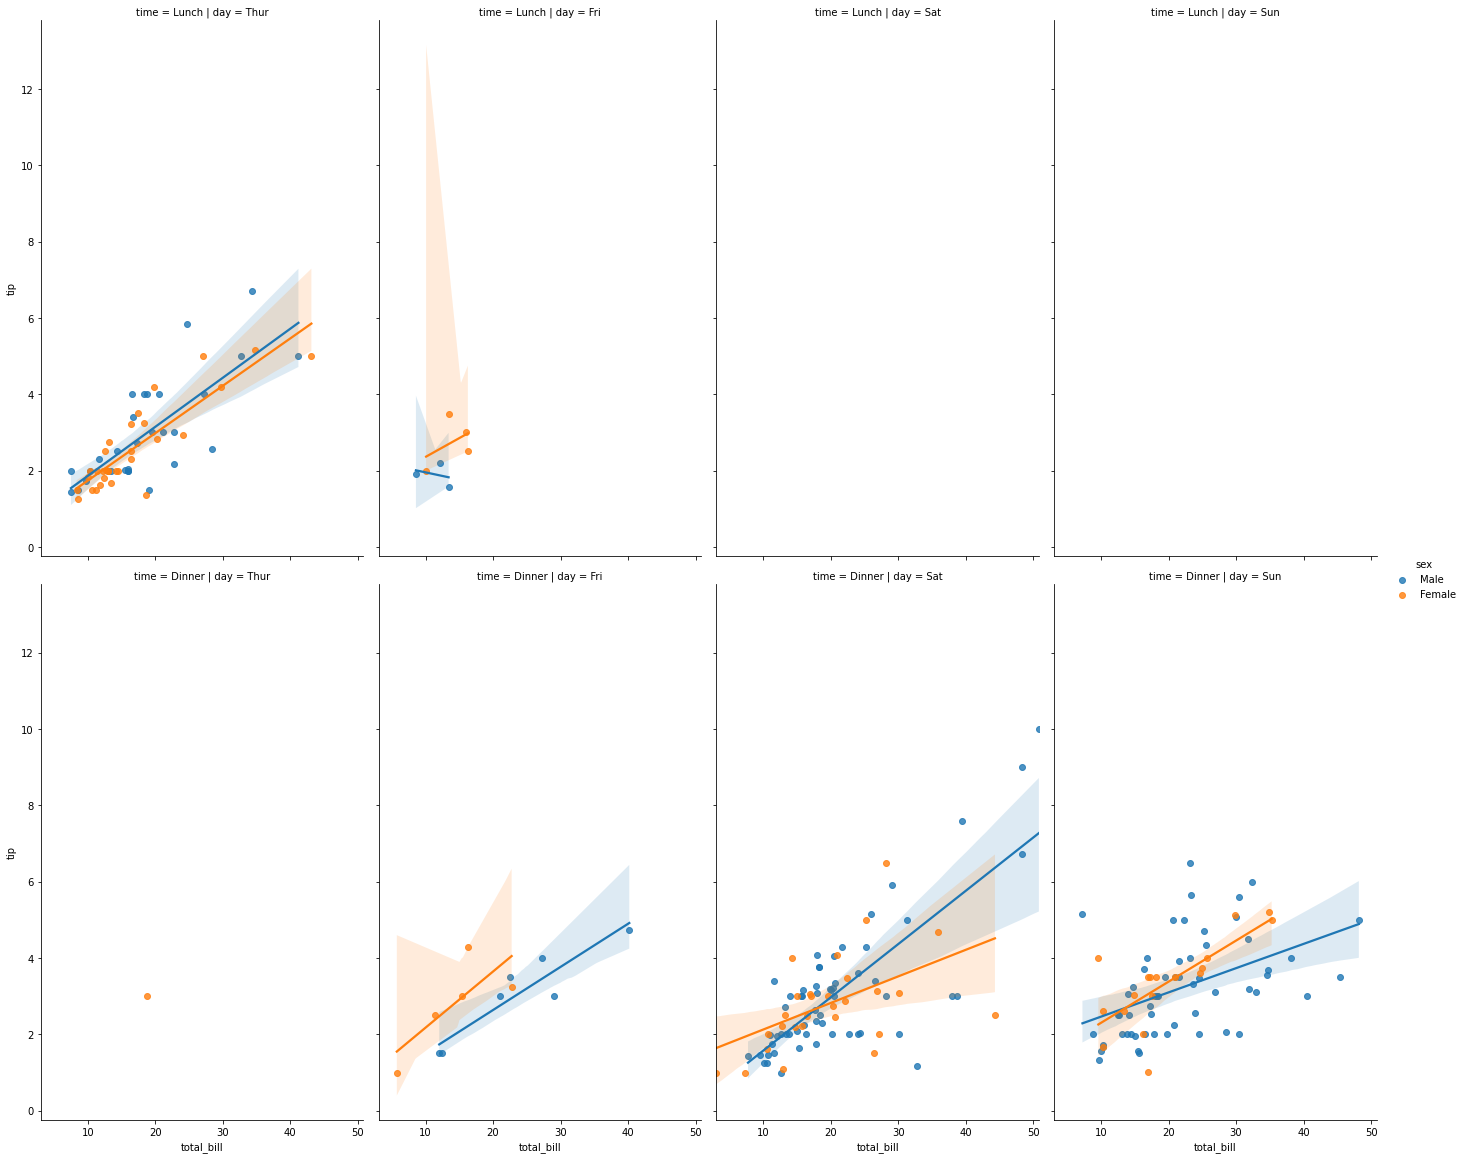

In [29]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex',aspect=0.6,size=8)

# style and color

<AxesSubplot:xlabel='sex', ylabel='count'>

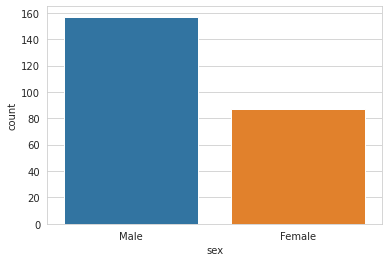

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)


<AxesSubplot:xlabel='sex', ylabel='count'>

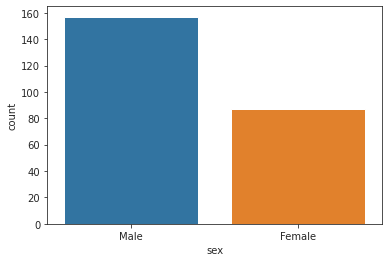

In [32]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

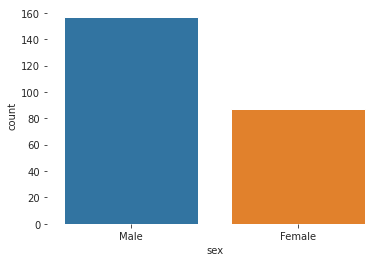

In [33]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

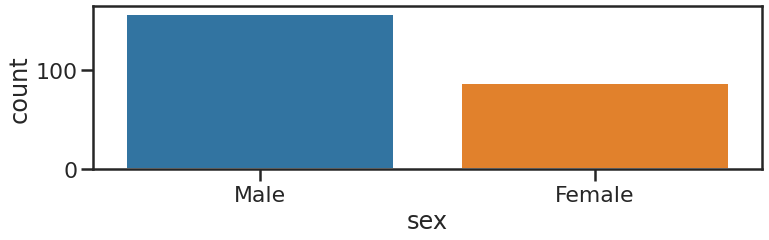

In [43]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

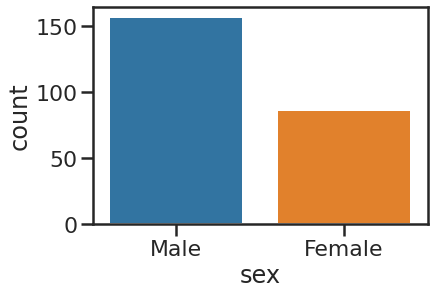

In [44]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips)

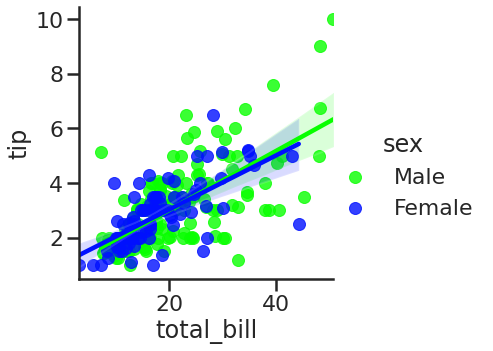

In [47]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette= 'hsv') #palette change of color